#Kaggle IMDB Horror Movies dataset

I saw this Halloween-special dataset and decided to give it a try: it's one thing doing exercises on DataCamp, it's another one to actually apply all I've learned so far to a "real thing", so let's try! Here's the dataset: https://www.kaggle.com/PromptCloudHQ/imdb-horror-movie-dataset/version/1

Let's load the usual tools first:


In [142]:
import pandas as pd

import matplotlib.pyplot as plt

In [143]:
horrors = pd.read_csv('IMDB Horror movies.csv')


Let's see what it is about:


In [102]:
horrors.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


In [103]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 12 columns):
Title                3328 non-null object
Genres               3327 non-null object
Release Date         3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3076 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
dtypes: float64(1), object(11)
memory usage: 312.1+ KB



OK, so it's just a few columns, 3328 rows but lots of information missing and most columns are of the type 'object', which is not very useful. There's some redundant information, like the year in the 'Title' column, but there's also some useful additionalinformation in the 'Plot' column. I can start with some cleanup. Please note that everything here is just the clean version of the notebook, as it took hours to find out how to do things :) 



To begin with, I can convert the 'Release Date' into timestamps, and then extract years, months and days of the week from there. To do it in one go I wrote a simple function.


In [144]:
horrors.loc[:,'Release Date'] = pd.to_datetime(horrors.loc[:,'Release Date'])

In [145]:
def datesplitter(date):
    '''extracts year, month, day and day of the week from a timestamp'''
    year = date.year
    month = date.month
    day = date.day
    weekday = date.weekday_name
    return year, month, day, weekday


And now to apply this to our dataframe: 


In [146]:
horrors[['RelYear', 'RelMonth', 'RelDay', 'RelWeekday']] = horrors.apply(lambda date: pd.Series(datesplitter(date['Release Date'])), axis = 1)

In [109]:
horrors.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
0,Gut (2012),Drama| Horror| Thriller,2012-10-26,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,10,26,Friday
1,The Haunting of Mia Moss (2017),Horror,2017-01-13,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,1,13,Friday
2,Sleepwalking (2017),Horror,2017-10-21,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,10,21,Saturday
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,2013-04-23,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,4,23,Tuesday
4,Infidus (2015),Crime| Drama| Horror,2015-04-10,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,4,10,Friday



At this point I can drop the 'Release Date' column, as it's not necessary anymore:


In [147]:
horrors = horrors.drop('Release Date', axis = 1)


While I'm at it, I will also remove the year from the 'Title' column. The year is always written as four digits in brackets, with a whitespace between the title and the first bracket: it's enough to remove it.


In [148]:

horrors['Title'] = horrors['Title'].str.replace('\s\(\d*\)', '')


In [112]:
horrors.head()

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
0,Gut,Drama| Horror| Thriller,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN,2012,10,26,Friday
1,The Haunting of Mia Moss,Horror,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000",2017,1,13,Friday
2,Sleepwalking,Horror,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN,2017,10,21,Saturday
3,Treasure Chest of Horrors II,Comedy| Horror| Thriller,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN,2013,4,23,Tuesday
4,Infidus,Crime| Drama| Horror,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN,2015,4,10,Friday



Now that we have the dates nicely split, we can have some first analysis: let's see how many movies were released in which year:


In [149]:
horrors.groupby('RelYear').size()

RelYear
2012    345
2013    429
2014    523
2015    602
2016    649
2017    780
dtype: int64


It would seem like there's been more and more horror movies released every year.


<BarContainer object of 12 artists>

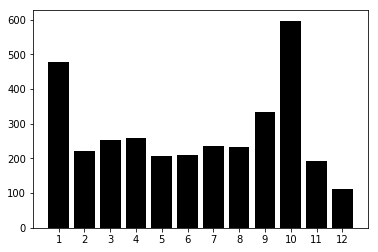

In [150]:
plt.bar(range(1,13), height = horrors.groupby('RelMonth').size(), tick_label = range(1,13), color = 'black')


October is clearly the month when most of these horror movies are being released, which makes perfect sense given the Halloween. On the other hand we don't want to be scared before X-mas, but then after the old year is gone, the horror makers come back!



We need a trick to get the release weekdays right, otherwise the days get sorted somehow randomly.


In [151]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdays_short = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [152]:
horrors['RelWeekday'] = pd.Categorical(horrors['RelWeekday'], categories = weekdays, ordered = True)

<BarContainer object of 7 artists>

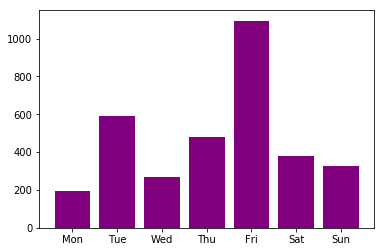

In [153]:
plt.bar(weekdays_short, height = horrors.groupby('RelWeekday').size(), color = 'purple')


Friday is definitely the most popular day to release these movies! Let's see how many are released on Friday, the 13th, and on Halloween.


In [154]:
horrors[(horrors['RelWeekday']=='Friday')&(horrors['RelDay']==13)]['Title'].size # movies released on Friday, the 13th.

57

In [155]:
horrors[(horrors['RelMonth']==10)&(horrors['RelDay']==31)]['Title'].size # movies released on Halloween

67


Now let's look at the 'Genres' column: only one value is missing there


In [156]:
horrors[horrors['Genres'].isnull() == True]

,Title,Genres,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,RelYear,RelMonth,RelDay,RelWeekday
866,The Returned,NaN,USA,NaN,NaN,NaN,"A Horror/Thriller about a young couple, strand...",NaN,NaN,NaN,NaN,2017,1,1,Sunday



From the plot description it seems like it's a horror/thriller, so this is how I'm going to fill this empty field:


In [157]:
horrors.loc[horrors['Genres'].isnull() == True, 'Genres'] = 'Horror| Thriller'


Let's look at the info again:


In [122]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 15 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3076 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
dtypes: category(1), float64(1), int64(3), object(10)
memory usage: 367.7+ KB



There's a lot of info missing in the Movie Rating column, but as there seems to be no way to estimate how these movies were rated in various countries, I'm just going to leave it as is.
On the other hand the Review Rating, which is how the movie is rated by IMDB users, has only a few percent of the values missing. We can fill these NaNs with the median of all ratings, which is 5.0. 


In [158]:
horrors['Review Rating'].median()

5.0

In [159]:
horrors['Review Rating'] = horrors['Review Rating'].fillna(horrors['Review Rating'].median())


Let's see if the movies are getting any better, as there is more and more of them:


In [160]:
horrors.groupby('RelYear')['Review Rating'].mean()

RelYear
2012    4.739420
2013    4.851515
2014    4.921033
2015    4.967608
2016    5.187211
2017    5.422821
Name: Review Rating, dtype: float64

In [ ]:

It would seems so, looking at the mean, but...


In [161]:
horrors.groupby('RelYear')['Review Rating'].median()

RelYear
2012    4.8
2013    4.8
2014    4.9
2015    5.0
2016    5.1
2017    5.0
Name: Review Rating, dtype: float64


There's something else going on, let's see:


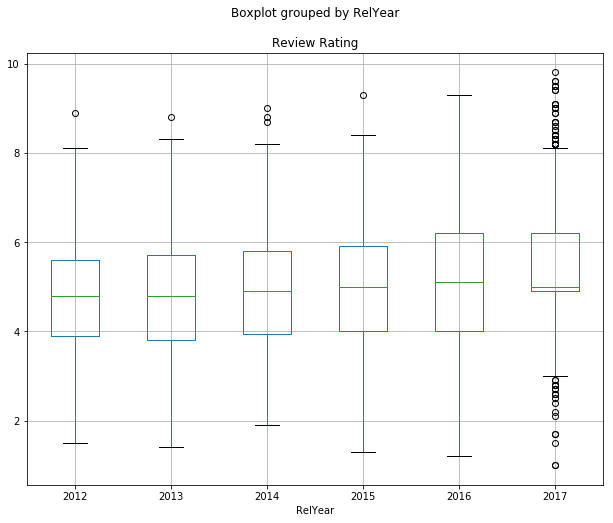

In [162]:
fig, ax = plt.subplots(figsize=(10,8))
horrors.boxplot(column = ['Review Rating'], by = 'RelYear', ax = ax)


So the median is pretty stable, but the mean keeps growing. 


In [163]:
for year in range (2012, 2018):
    print(year, min(horrors.loc[horrors['RelYear']==year, 'Review Rating']), max(horrors.loc[horrors['RelYear']==year, 'Review Rating']))

2012 1.5 8.9
2013 1.4 8.8
2014 1.9 9.0
2015 1.3 9.3
2016 1.2 9.3
2017 1.0 9.8



We could say that with the increasing number of movies comes higher spread of review ratings' values. There must have been some very highly rated movies in 2017 to push the mean higher. 


In [164]:
horrors[horrors['Review Rating']>9.3].size

120


In 2017 there were in fact 120 movies rated higher than the maximum review rating from the year before! On the other hand...


In [165]:
horrors[(horrors['Review Rating']<1.2)&(horrors['RelYear']==2017)].size

30

...there were also 30 movies rated lower than the worst of the previous year! More horrors, more extremes. 


Now off to the next column, Movie Run Time. There's actually a lot of info missing here, roughly 17%. Let's begin with extracting the actual time from what's available. We just need to get all the digits, and then convert them to integers.


In [166]:
horrors['Minutes'] = horrors['Movie Run Time'].str.extract('(\d+)', expand = True)

In [168]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 16 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              2784 non-null object
dtypes: category(1), float64(1), int64(3), object(11)
memory usage: 393.7+ KB


In [170]:
horrors['Minutes'] = horrors.loc[horrors['Minutes'].notnull(), 'Minutes'].astype('int')

In [171]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 16 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              2784 non-null float64
dtypes: category(1), float64(2), int64(3), object(10)
memory usage: 393.7+ KB



There's roughly 17% of values missing in the 'Movie Run Time'. Let's see if it would make sense to fill them with some averaged value:


In [172]:
horrors['Minutes'].median()

90.0

In [173]:
horrors['Minutes'].mean()

90.92420977011494

In [174]:
horrors.groupby('RelYear')['Minutes'].median()

RelYear
2012    89.0
2013    89.0
2014    90.0
2015    90.0
2016    89.0
2017    90.0
Name: Minutes, dtype: float64

In [175]:
horrors.groupby('RelYear')['Minutes'].mean()

RelYear
2012    90.528814
2013    90.438287
2014    91.154013
2015    90.822430
2016    91.762250
2017    90.550459
Name: Minutes, dtype: float64


Looks like 90 minutes really is a standard run time for a movie (it was like that back in the VHS days, you could fit two average movies on a 180 minutes tape! :) I'm going to replace the NaNs with the median:


In [177]:
horrors['Minutes'] = horrors['Minutes'].fillna(horrors['Minutes'].median())


Now I can drop the original 'Movie Run Time' column:


In [180]:
horrors = horrors.drop('Movie Run Time', axis = 1)

In [179]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 16 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Movie Run Time       2784 non-null object
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              3328 non-null float64
dtypes: category(1), float64(2), int64(3), object(10)
memory usage: 393.7+ KB



Back to the 'Genres' column: it seems like almost every movie on this list is classified as more than one genre. After some experimenting I came up with a function which does the one-hot encoding, creating a column for each genre and then filling it with 1 when a given movie is classified as that genre: later I just need to fill the resulting NaNs with zeros. To do that we need to import RegEx.


In [184]:
import re

In [185]:
def splitter(dataframe, column):
    '''extracts single words (genres) in each row, returns 1 in a column corresponding to the found genre'''
    for row in dataframe.index:
        for word in re.findall('\w+', dataframe.loc[row, column]):
            dataframe.loc[row, word] = 1
    return dataframe

In [186]:
horrors = splitter(horrors, 'Genres')

In [188]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 39 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              3328 non-null float64
Drama                531 non-null float64
Horror               3328 non-null float64
Thriller             1379 non-null float64
Comedy               513 non-null float64
Crime                121 non-null float64
Action               336 non-null float64
Sci     


Two problems: lots of NaNs, and 'Sci Fi' was interpreted as two separate words, creating two columns. I will simply copy one of the two columns as 'SciFi' and then drop the other two.


In [189]:
horrors['SciFi'] = horrors['Sci']

In [192]:
horrors = horrors.drop(['Sci', 'Fi'], axis = 1)

In [193]:
horrors.columns

Index(['Title', 'Genres', 'Release Country', 'Movie Rating', 'Review Rating',
       'Plot', 'Cast', 'Language', 'Filming Locations', 'Budget', 'RelYear',
       'RelMonth', 'RelDay', 'RelWeekday', 'Minutes', 'Drama', 'Horror',
       'Thriller', 'Comedy', 'Crime', 'Action', 'Mystery', 'Adventure',
       'Fantasy', 'Romance', 'War', 'Western', 'Sport', 'Animation', 'History',
       'Musical', 'Music', 'Family', 'Biography', 'Adult', 'Reality', 'TV',
       'SciFi'],
      dtype='object')

In [196]:
horrors.loc[:,'Drama':'SciFi'] = horrors.loc[:,'Drama':'SciFi'].fillna(0)

In [197]:
horrors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 38 columns):
Title                3328 non-null object
Genres               3328 non-null object
Release Country      3328 non-null object
Movie Rating         1451 non-null object
Review Rating        3328 non-null float64
Plot                 3327 non-null object
Cast                 3314 non-null object
Language             3257 non-null object
Filming Locations    2096 non-null object
Budget               1234 non-null object
RelYear              3328 non-null int64
RelMonth             3328 non-null int64
RelDay               3328 non-null int64
RelWeekday           3328 non-null category
Minutes              3328 non-null float64
Drama                3328 non-null float64
Horror               3328 non-null float64
Thriller             3328 non-null float64
Comedy               3328 non-null float64
Crime                3328 non-null float64
Action               3328 non-null float64
Myst


As said at the beginning, there is some interesting info in the 'Plot' column. It seems to be always starting with "Directed by ". Using RegEx, we can extract the names that come after those words, but before the end of the first sentence (or actually before the beginning of the second one, which always start with "With ":


In [206]:
pattern = '(?<=by\s)(.*?)(?:. With)' #non-greedy, any number of characters, preceded by the string "by ", followed by ". With"

horrors['Director'] = horrors['Plot'].str.extract(pattern, expand = True)


Another operation on string is splitting the cast into single actors. There are too many to do the one-hot encoding, but we can convert the strings to lists of names, using the fact that they're always separated by the same symbol.


In [208]:
horrors['Cast'] = horrors['Cast'].str.split('(?:[|])')

In [209]:
horrors.sample(3)

,Title,Genres,Release Country,Movie Rating,Review Rating,Plot,Cast,Language,Filming Locations,Budget,...,History,Musical,Music,Family,Biography,Adult,Reality,TV,SciFi,Director
1689,Werewolves in Heat,Comedy| Horror,USA,NaN,5.7,Directed by Lance Polland. With Minchi Murakam...,"[Minchi Murakami, Christopher Raff, Ron Jeremy...",English,"Fullerton, California, USA",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lance Polland
2388,Strange Events,Horror,USA,NaN,4.9,"Directed by Chris Barnes, Alessandro Frosali, ...","[Becka Adams, Anthony Backman, Elena Chernyako...",English,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Chris Barnes, Alessandro Frosali, Jay Holben"
281,The Black Tape,Crime| Horror| Mystery| Thriller,USA,NaN,7.6,"Directed by Ramone Menon. With Elina Madison, ...","[Elina Madison, Allen Marsh, Oto Brezina, Mela...",English,"Los Angeles, California, USA","$55,000",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ramone Menon



Now that all the casts are lists, we can simply add them together...


In [213]:
actors = horrors[horrors['Cast'].notnull()]['Cast'].sum() #NaNs must be filtered out for this to work

In [ ]:

...and see who appears frequently in these movies:


In [218]:
actors_freq = {name:actors.count(name) for name in actors}

In [219]:
max(actors_freq.values())

29


Looks like someone starred in 29 of our movies!


In [220]:
{name:actors_freq[name] for name in actors_freq.keys() if actors_freq[name] > 10}

{'Asami': 11,
 'Bill Moseley': 18,
 'Bill Oberst Jr.': 18,
 'Brinke Stevens': 18,
 'Caroline Williams': 11,
 'Danny Trejo': 11,
 'Dawna Lee Heising': 11,
 'Debbie Rochon': 23,
 'Devanny Pinn': 11,
 'Doug Jones': 12,
 'Elissa Dowling': 17,
 'Eric Roberts': 28,
 'Felissa Rose': 14,
 'Jessica Cameron': 13,
 'Kane Hodder': 16,
 'Lance Henriksen': 15,
 'Larry Fessenden': 15,
 'Lee Bane': 13,
 'Lin Shaye': 11,
 'Linnea Quigley': 13,
 'Lloyd Kaufman': 29,
 'Lynn Lowry': 12,
 'Maria Olsen': 21,
 'Mindy Robinson': 15,
 'Ray Wise': 12,
 'Richard Riehle': 11,
 'Ron Jeremy': 13,
 'Shawn C. Phillips': 14,
 'Stephen McHattie': 11,
 'Suzi Lorraine': 16,
 'Tiffany Shepis': 15,
 'Tony Todd': 14}


Lloyd Kaufman and Eric Roberts are the most frequently appearing in our list.



Here's a function (pretty slow, and I hope I can find a way to make it faster) that sets a True/False flag in a dedicated column, to later filter the movies where these actors appear:


In [232]:
def actorfinder(item):
    if 'Lloyd Kaufman' in item:
        answer = True
    else:
        answer = False
    return answer

In [227]:
horrors['Lloyd Kaufman'] = horrors[horrors['Cast'].notnull()].apply(lambda x: pd.Series(actorfinder(x['Cast'])), axis = 1)

In [233]:
horrors[horrors['Lloyd Kaufman']==True]['Review Rating'].median()

5.5

In [234]:
horrors['Review Rating'].median()

5.0


No wonder Lloyd Kaufman appears in so many movies: his presence guarantees it's gonna be good.. or it's the other way round, he chooses wisely the movies to star in. One way or the other, the movies with Lloyd Kaufman have ratings 10% above the global median.


_TO BE CONTINUED..._